## Prepare Dataset for Two Classes

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/home/ngsci/datasets/brca-psj-path/supplementary/contest-phase-2/slide-manifest-train.csv")
df1 = pd.read_csv("/home/ngsci/datasets/brca-psj-path/supplementary/contest-phase-2/csv-train/demographics.csv")
df3 = pd.read_csv("/home/ngsci/datasets/brca-psj-path/supplementary/contest-phase-2/csv-train/outcomes.csv")
sexes = list()
races = list()
stages = list()
stage_to_label = {'0': '0', 'IA': '1', 'IIA': '2', 'IIB': '2', 'IIIC': '3', 'IV': '4', 'IIIA': '3', 'IIIB': '3', 
                  'IB': '1'}
for row in df.iterrows():
    slide_id = row[1]["slide_id"]
    biopsy_id = row[1]["biopsy_id"]
    df2 = df1.loc[df1["biopsy_id"] == biopsy_id]
    sex = df2.iloc[0]["sex"]
    race = df2.iloc[0]["race"]
    df2 = df3.loc[df3["biopsy_id"] == biopsy_id]
    stage = stage_to_label[df2.iloc[0]["stage"]]
    
    sexes.append(sex)
    races.append(race)
    stages.append(stage)
df["sex"] = sexes
df["race"] = races
df["stage"] = stages
df.head()

,slide_id,biopsy_id,slide_path,sex,race,stage
0,028ad74f-ebd7-45e5-92da-b0f2ded35fdf,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,/home/ngsci/datasets/brca-psj-path/ndpi/028ad7...,F,4,2
1,0d677646-f6f8-4303-9c2c-4e7a39d8fdbb,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,/home/ngsci/datasets/brca-psj-path/ndpi/0d6776...,F,4,2
2,4716c9f5-1eba-444a-9658-39c0cab80f05,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,/home/ngsci/datasets/brca-psj-path/ndpi/4716c9...,F,4,2
3,6d9c5580-246b-4c29-a61f-674a2c07a556,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,/home/ngsci/datasets/brca-psj-path/ndpi/6d9c55...,F,4,2
4,7787542f-9bea-419b-b3fd-84de67ddc42e,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,/home/ngsci/datasets/brca-psj-path/ndpi/778754...,F,4,2


In [17]:
df.to_csv("/home/ngsci/project/Armin/metadata/data.csv", index=False)

In [18]:
df = pd.read_csv("/home/ngsci/project/Armin/metadata/data.csv")
df_filtered = df[~df["stage"].isin([1, 2])]

df_filtered.loc[df_filtered["stage"].isin([3, 4]), "stage"] = 1
df_filtered.loc[df_filtered["stage"] == 0, "stage"] = 0

df_filtered = df_filtered[df_filtered["stage"].isin([0, 1])]
biopsy_race = df_filtered.drop_duplicates(subset=["biopsy_id", "race"])[["biopsy_id", "race"]]

train_biopsy, test_biopsy = train_test_split(biopsy_race, test_size=0.1, random_state=42)

train_df = df_filtered[df_filtered["biopsy_id"].isin(train_biopsy["biopsy_id"])]
test_df = df_filtered[df_filtered["biopsy_id"].isin(test_biopsy["biopsy_id"])]

In [19]:
train_df_agg = train_df.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()
# valid_df_agg = valid_df.groupby("biopsy_id").agg({
#     "stage": "first",
#     "race": "first"}).reset_index()
test_df_agg = test_df.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()
total_df_agg = df_filtered.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()

In [20]:
train_df_agg.describe()

,stage,race
count,369.000000,369.000000
mean,0.571816,2.363144
std,0.495487,2.537404
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,3.000000
max,1.000000,9.000000


In [21]:
train_df.describe()

,race,stage
count,3581.000000,3581.000000
mean,2.085172,0.843061
std,2.340738,0.363794
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,9.000000,1.000000


In [23]:
test_df_agg.describe()

,stage,race
count,41.000000,41.000000
mean,0.463415,2.146341
std,0.504854,2.475490
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,9.000000


In [24]:
test_df.describe()

,race,stage
count,401.000000,401.000000
mean,2.194514,0.827930
std,2.232055,0.377913
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,1.000000
max,9.000000,1.000000


In [79]:
sum(train_df_agg.stage == 0) / len(train_df_agg)

0.4115853658536585

In [80]:
sum(train_df_agg.stage == 1) / len(train_df_agg)

0.5884146341463414

In [81]:
sum(train_df_agg.race == 1)

234

In [82]:
sum(train_df_agg.race != 1)

94

In [83]:
sum(valid_df_agg.stage == 0) / len(valid_df_agg)

0.4878048780487805

In [84]:
sum(valid_df_agg.stage == 1) / len(valid_df_agg)

0.5121951219512195

In [85]:
sum(valid_df_agg.race == 1)

28

In [86]:
sum(valid_df_agg.race != 1)

13

In [87]:
sum(test_df_agg.stage == 0) / len(test_df_agg)

0.6097560975609756

In [88]:
sum(test_df_agg.stage == 1) / len(test_df_agg)

0.3902439024390244

In [89]:
sum(test_df_agg.race == 1)

32

In [90]:
sum(test_df_agg.race != 1)

9

In [5]:
len(df_filtered)

3982

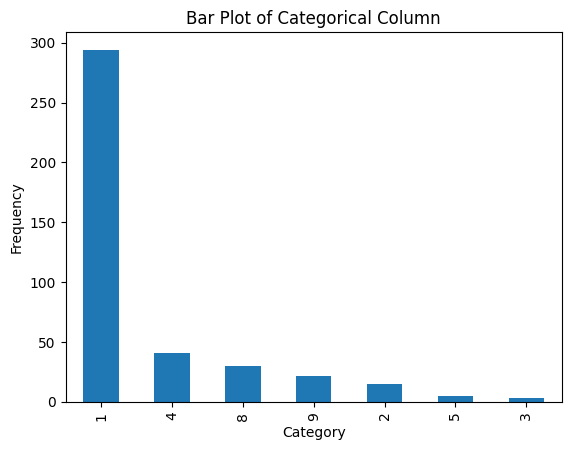

In [4]:
total_df_agg['race'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Categorical Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

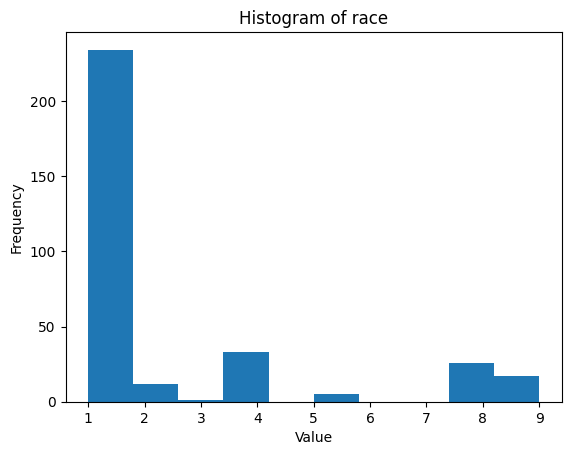

In [9]:
plt.hist(train_df_agg['race'])
plt.title('Histogram of race')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

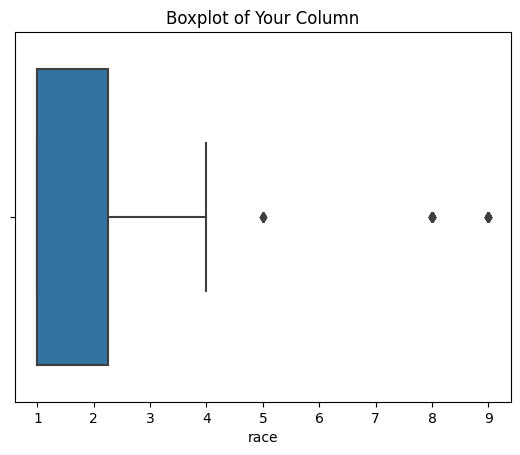

In [10]:
sns.boxplot(x=train_df_agg['race'])
plt.title('Boxplot of Your Column')
plt.show()

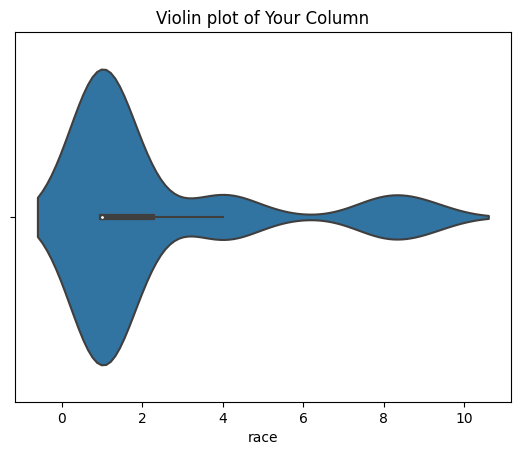

In [11]:
sns.violinplot(x=train_df_agg['race'])
plt.title('Violin plot of Your Column')
plt.show()

/tmp/ipykernel_215/3200221255.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df_agg['race'], shade=True)


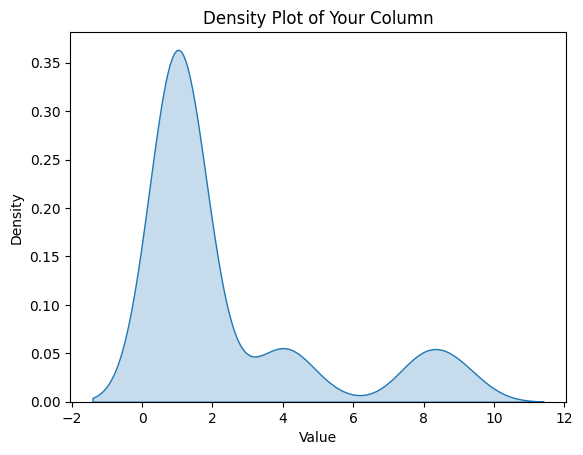

In [12]:
sns.kdeplot(train_df_agg['race'], shade=True)
plt.title('Density Plot of Your Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

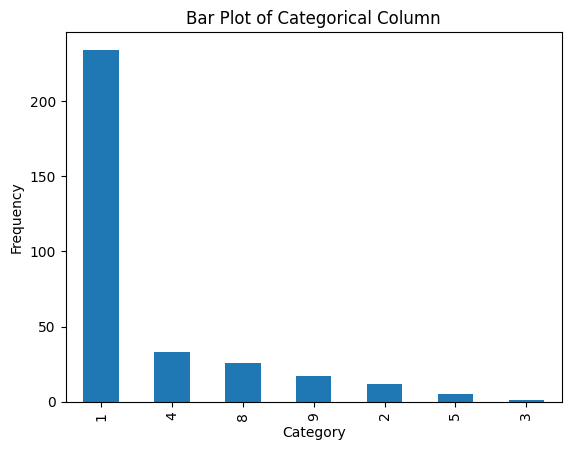

In [13]:
train_df_agg['race'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Categorical Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

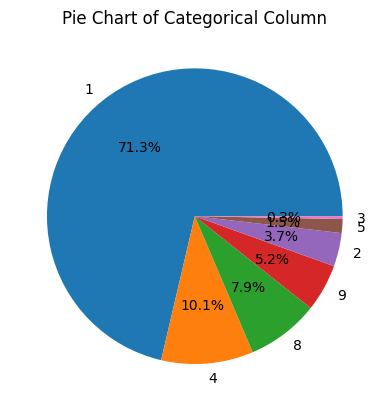

In [14]:
train_df_agg['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Column')
plt.ylabel('')
plt.show()

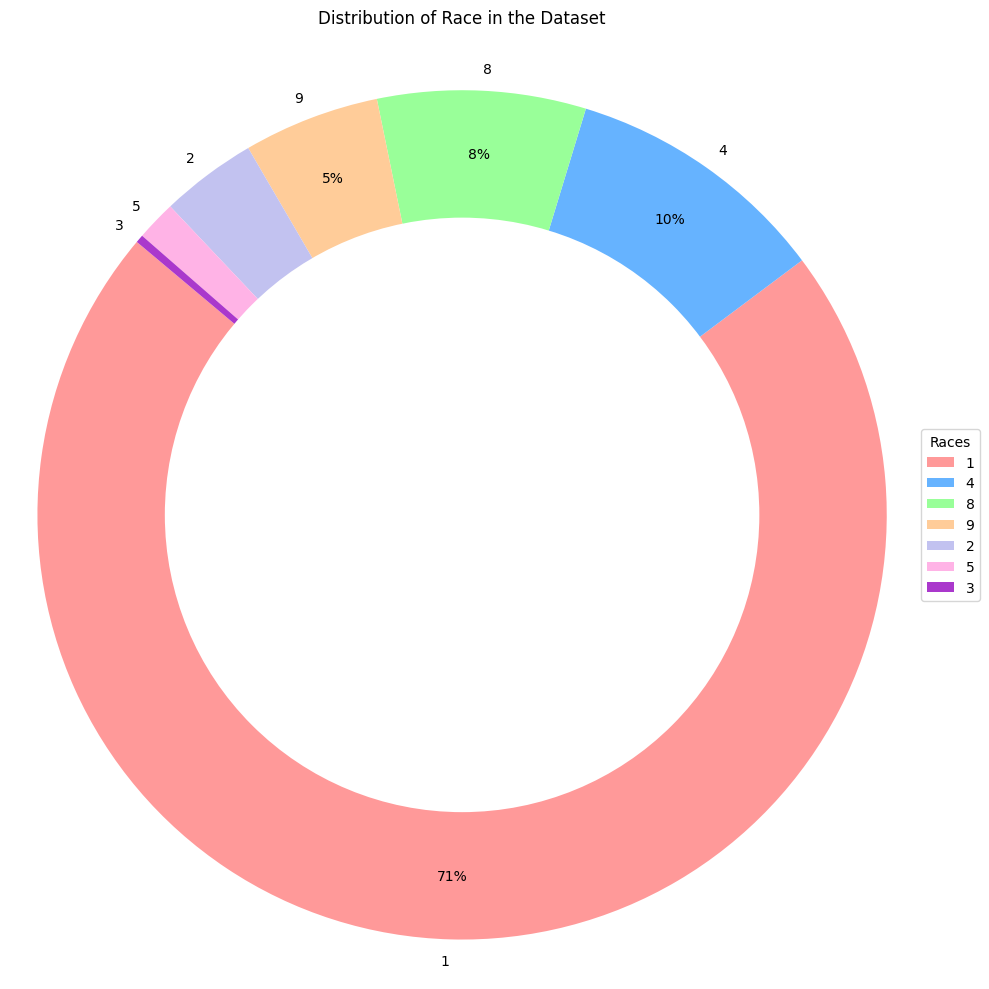

In [29]:
# Assuming train_df_agg is your DataFrame and 'race' is the column of interest
race_counts = train_df_agg['race'].value_counts()

# Create an 'explode' tuple that has the same number of elements as there are categories
# If you do not want to offset any slices, you can simply use
explode = tuple([0] * len(race_counts))  # No slice is exploded

# Or if you want to explode the first slice slightly, for example:
explode = tuple([0.1] + [0] * (len(race_counts) - 1))  # Only the first slice is exploded
# Colors and explode data
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', "#aa38cc"]


# Creating the pie chart
plt.figure(figsize=(10, 10))
plt.pie(race_counts, labels=race_counts.index, autopct=lambda p: '{:.0f}%'.format(p) if p >= 5 else '', startangle=140, colors=colors, labeldistance=1.05, pctdistance=0.85)

# Draw a circle at the center to turn it into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title and remove the y-axis label
plt.title('Distribution of Race in the Dataset', pad=20)
plt.ylabel('')  # You've already done this, just for completeness

# Add a legend
plt.legend(title='Races', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()  # Adjust the layout to fit well
plt.show()


In [3]:
train_df.head()

,Unnamed: 0,biopsy_id,stage,race,slide_id
101,101,0219944f-0fc7-485f-bdb7-7f59c08ade11,0,4,16e0483c-b40e-4bb9-b56e-6bb438f89bfd
102,102,0219944f-0fc7-485f-bdb7-7f59c08ade11,0,4,51cf622f-f466-436d-892c-d4bd92b2daa4
107,107,02590d75-3210-41ba-946d-35bd8b2e8c9b,1,1,11b6cf08-0627-4707-9987-fb2b3d32447c
108,108,02590d75-3210-41ba-946d-35bd8b2e8c9b,1,1,279682a0-7a03-4e9b-8044-2342a3c3a7e8
109,109,02590d75-3210-41ba-946d-35bd8b2e8c9b,1,1,adc2d2b3-0cb5-4241-91ce-2bf07604961a


In [6]:
!pwd

/home/ngsci/project/Armin


In [25]:
train_df.to_csv("/home/ngsci/project/Armin/metadata_cr2/train.csv", index=False)
# valid_df.to_csv("/home/ngsci/project/Armin/metadata/valid.csv", index=False)
test_df.to_csv("/home/ngsci/project/Armin/metadata_cr2/test.csv", index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_biopsy_per_race(df, title):
    """
    Plots the count of biopsy_id per race.
    
    Parameters:
        df (pd.DataFrame): The dataframe to plot.
        title (str): Title for the plot.
    """
    counts = df.drop_duplicates(subset=["biopsy_id", "race"]).groupby("race")["biopsy_id"].count().reset_index()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="race", y="biopsy_id", data=counts, palette="viridis")
    plt.xlabel("Race")
    plt.ylabel("Number of biopsy_id")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

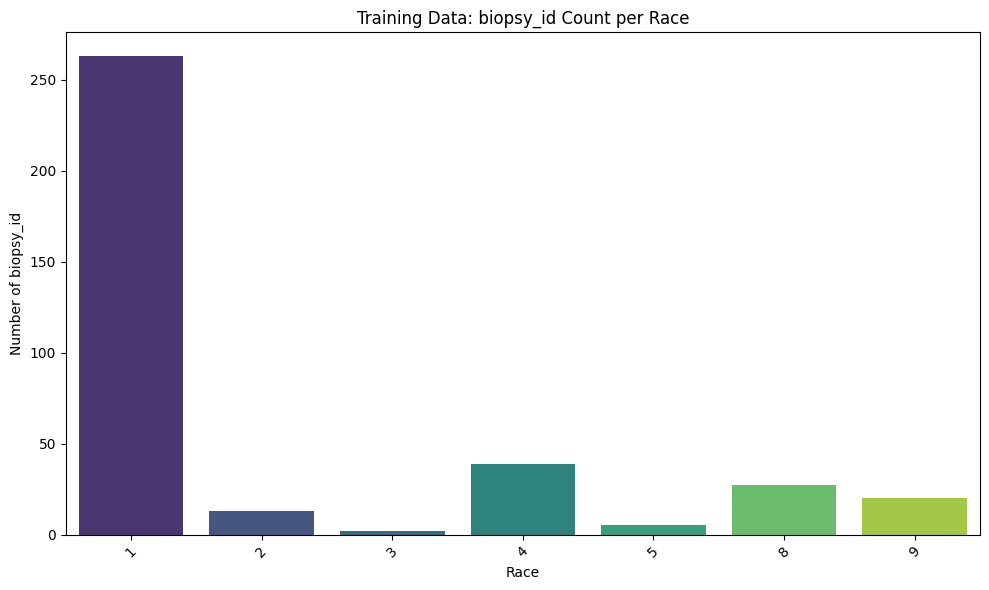

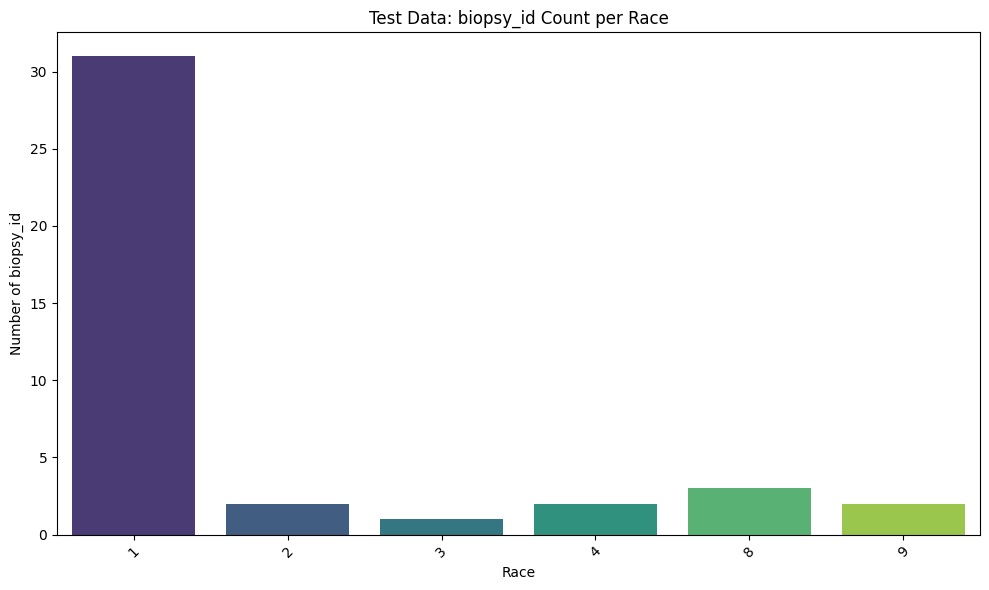

In [27]:
plot_biopsy_per_race(train_df, "Training Data: biopsy_id Count per Race")
# plot_biopsy_per_race(valid_df, "Validation Data: biopsy_id Count per Race")
plot_biopsy_per_race(test_df, "Test Data: biopsy_id Count per Race")

In [28]:
def plot_biopsy_per_stage(df, title):
    """
    Plots the count of biopsy_id per stage.
    
    Parameters:
        df (pd.DataFrame): The dataframe to plot.
        title (str): Title for the plot.
    """
    counts = df.drop_duplicates(subset=["biopsy_id", "stage"]).groupby("stage")["biopsy_id"].count().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="stage", y="biopsy_id", data=counts, palette="viridis")
    plt.xlabel("Stage")
    plt.ylabel("Number of biopsy_id")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

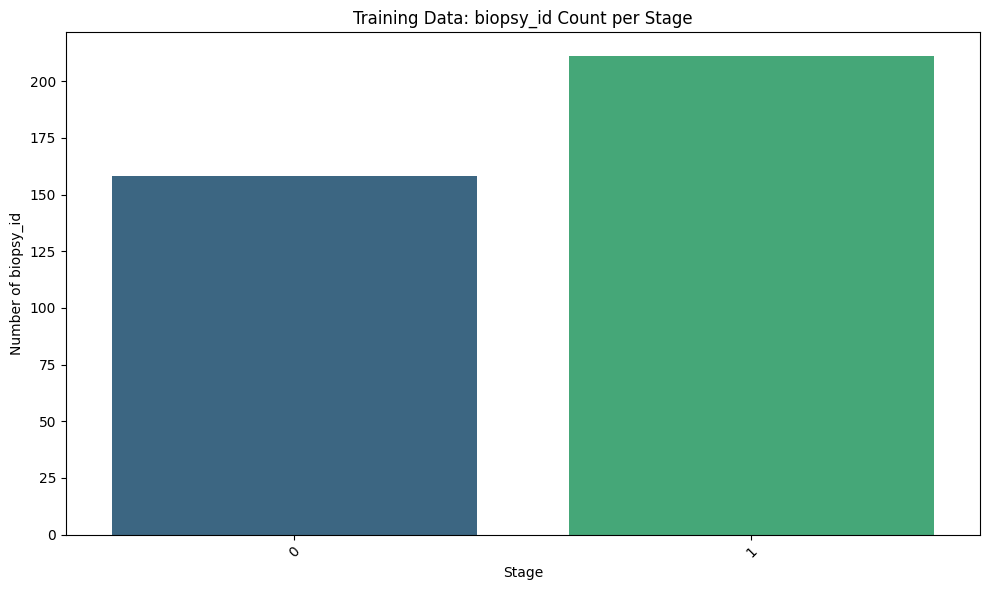

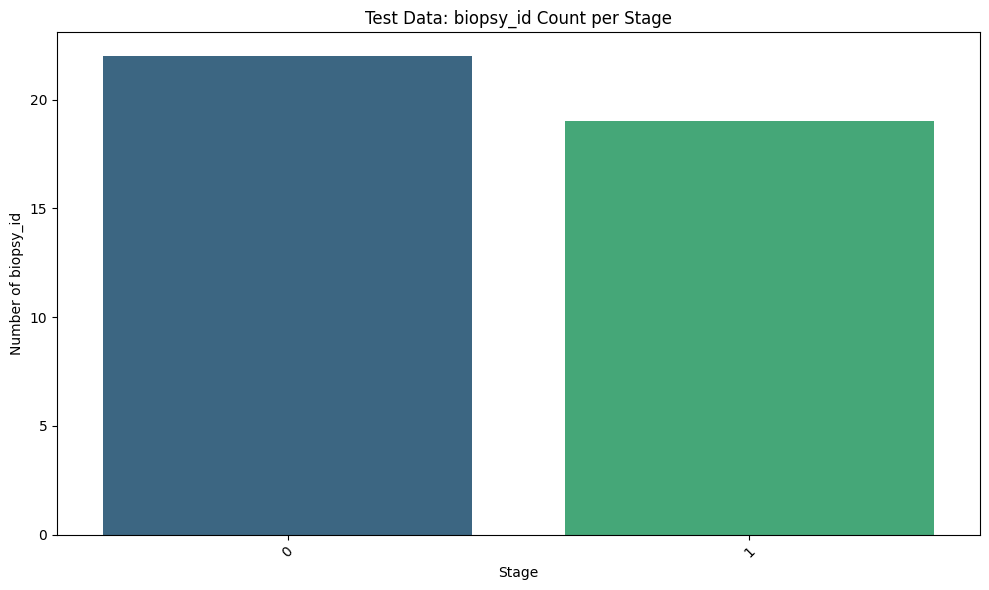

In [29]:
plot_biopsy_per_stage(train_df, 'Training Data: biopsy_id Count per Stage')
# plot_biopsy_per_stage(valid_df, 'Validation Data: biopsy_id Count per Stage')
plot_biopsy_per_stage(test_df, 'Test Data: biopsy_id Count per Stage')

In [41]:
import os
import shutil
import pandas as pd

def copy_images_to_structure(df, source_folder, target_folder):
    """
    Copies images from the source folder to a new folder structure suitable for Image Folder.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'slide_id' and 'stage' columns.
        source_folder (str): Path to the folder containing original images.
        target_folder (str): Path to the target folder to store new folder structure.
    """
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    
    for index, row in df.iterrows():
        try:
            file_name = row["slide_id"] + ".png"
            class_label = str(row["stage"])

            new_path = os.path.join(target_folder, class_label)
            if not os.path.exists(new_path):
                os.makedirs(new_path)

            shutil.copy(os.path.join(source_folder, file_name), os.path.join(new_path, file_name))
        except Exception as err:
            print(err)
            

In [1]:
!ls /home/ngsci/datasets/brca-psj-path/contest-phase-2/png-downsampled-train | wc -l

10846


In [2]:
!ls /home/ngsci/datasets/brca-psj-path/contest-phase-2/png-downsampled-holdout | wc -l

14466


In [ ]:
!ls /home/ngsci/datasets/brca-psj-path/ndpi | wc -l

In [ ]:
datasets/brca-psj-path/supplementary/contest-phase-2/png-downsampled-train/b202b88d-3a0e-47c8-a5e3-da2a333a6911.png

In [42]:
source_folder = "/home/ngsci/datasets/brca-psj-path/supplementary/contest-phase-2/png-downsampled-train"
target_folder_train = "/home/ngsci/project/Armin/metadata_cr2/train" 
# target_folder_valid = "/home/ngsci/project/Armin/metadata/valid"
target_folder_test = "/home/ngsci/project/Armin/metadata_cr2/test"
copy_images_to_structure(train_df, source_folder, target_folder_train)
# copy_images_to_structure(valid_df, source_folder, target_folder_valid)
copy_images_to_structure(test_df, source_folder, target_folder_test)

In [51]:
!pwd

/home/ngsci/project/Armin


## Prepare Dataset For three Classes

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [92]:
df = pd.read_csv("/home/ngsci/project/Armin/metadata/data.csv")
df.loc[df["stage"].isin([1, 2]), "stage"] = 1
df.loc[df["stage"].isin([3, 4]), "stage"] = 2
df.loc[df["stage"] == 0, "stage"] = 0

df = df[df["stage"].isin([0, 1, 2])]
biopsy_race = df.drop_duplicates(subset=["biopsy_id", "race"])[["biopsy_id", "race"]]

train_biopsy, temp_biopsy = train_test_split(biopsy_race, test_size=0.2, random_state=42)
valid_biopsy, test_biopsy = train_test_split(temp_biopsy, test_size=0.5, random_state=42)

train_df = df[df["biopsy_id"].isin(train_biopsy["biopsy_id"])]
valid_df = df[df["biopsy_id"].isin(valid_biopsy["biopsy_id"])]
test_df = df[df["biopsy_id"].isin(test_biopsy["biopsy_id"])]

In [93]:
train_df_agg = train_df.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()
valid_df_agg = valid_df.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()
test_df_agg = test_df.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()
total_df_agg = df_filtered.groupby("biopsy_id").agg({
    "stage": "first",
    "race": "first"}).reset_index()

In [96]:
sum(train_df_agg.race == 1)

483

In [97]:
sum(train_df_agg.race != 1)

317

In [98]:
sum(valid_df_agg.race == 1)

66

In [99]:
sum(valid_df_agg.race != 1)

34

In [100]:
sum(test_df_agg.race == 1)

61

In [101]:
sum(test_df_agg.race != 1)

39

In [94]:
sum(train_df_agg.stage == 0) / len(train_df_agg)

0.1825

In [95]:
sum(train_df_agg.stage == 1) / len(train_df_agg)

0.58

In [34]:
sum(train_df_agg.stage == 2) / len(train_df_agg)

0.2375

In [35]:
sum(valid_df_agg.stage == 0) / len(valid_df_agg)

0.16

In [36]:
sum(valid_df_agg.stage == 1) / len(valid_df_agg)

0.6

In [37]:
sum(valid_df_agg.stage == 2) / len(valid_df_agg)

0.24

In [38]:
sum(test_df_agg.stage == 0) / len(test_df_agg)

0.18

In [39]:
sum(test_df_agg.stage == 1) / len(test_df_agg)

0.66

In [40]:
sum(test_df_agg.stage == 2) / len(test_df_agg)

0.16

In [23]:
train_df.head()

,Unnamed: 0,biopsy_id,stage,race,slide_id
0,0,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,1,4,028ad74f-ebd7-45e5-92da-b0f2ded35fdf
1,1,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,1,4,0d677646-f6f8-4303-9c2c-4e7a39d8fdbb
2,2,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,1,4,4716c9f5-1eba-444a-9658-39c0cab80f05
3,3,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,1,4,6d9c5580-246b-4c29-a61f-674a2c07a556
4,4,00047e6d-cf9e-41f8-8901-eb9b0fe155a6,1,4,7787542f-9bea-419b-b3fd-84de67ddc42e


In [28]:
train_df_agg.describe()

,stage,race
count,800.00000,800.000000
mean,1.05500,2.912500
std,0.64614,2.840322
min,0.00000,1.000000
25%,1.00000,1.000000
50%,1.00000,1.000000
75%,1.00000,4.000000
max,2.00000,9.000000


In [24]:
train_df.describe()

,Unnamed: 0,stage,race
count,8847.000000,8847.000000,8847.000000
mean,5339.933989,1.249576,3.462643
std,3106.799383,0.550310,3.003679
min,0.000000,0.000000,1.000000
25%,2567.500000,1.000000,1.000000
50%,5306.000000,1.000000,2.000000
75%,8031.500000,2.000000,5.000000
max,10845.000000,2.000000,9.000000


In [25]:
valid_df.describe()

,Unnamed: 0,stage,race
count,967.000000,967.000000,967.000000
mean,6071.396070,1.291624,3.622544
std,2987.845901,0.566273,3.288607
min,103.000000,0.000000,1.000000
25%,3493.500000,1.000000,1.000000
50%,6399.000000,1.000000,1.000000
75%,8621.500000,2.000000,8.000000
max,10792.000000,2.000000,9.000000


In [29]:
valid_df_agg.describe()

,stage,race
count,100.000000,100.000000
mean,1.080000,2.900000
std,0.630536,3.036811
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,4.000000
max,2.000000,9.000000


In [26]:
test_df.describe()

,Unnamed: 0,stage,race
count,1032.000000,1032.000000,1032.000000
mean,5522.285853,1.222868,3.645349
std,3388.552978,0.547227,3.023702
min,364.000000,0.000000,1.000000
25%,2990.750000,1.000000,1.000000
50%,4747.500000,1.000000,2.000000
75%,8882.250000,2.000000,8.000000
max,10840.000000,2.000000,9.000000


In [30]:
test_df_agg.describe()

,stage,race
count,100.000000,100.000000
mean,0.980000,2.940000
std,0.585688,2.891366
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,4.000000
max,2.000000,9.000000


In [ ]:
train_df.to_csv("home/ngsci/project/metadata2/train.csv", index=False)
valid_df.to_csv("home/ngsci/project/metadata2/valid.csv", index=False)
test_df.to_csv("home/ngsci/project/metadata2/test.csv", index=False)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_biopsy_per_race(df, title):
    """
    Plots the count of biopsy_id per race.
    
    Parameters:
        df (pd.DataFrame): The dataframe to plot.
        title (str): Title for the plot.
    """
    counts = df.drop_duplicates(subset=["biopsy_id", "race"]).groupby("race")["biopsy_id"].count().reset_index()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="race", y="biopsy_id", data=counts, palette="viridis")
    plt.xlabel("Race")
    plt.ylabel("Number of biopsy_id")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

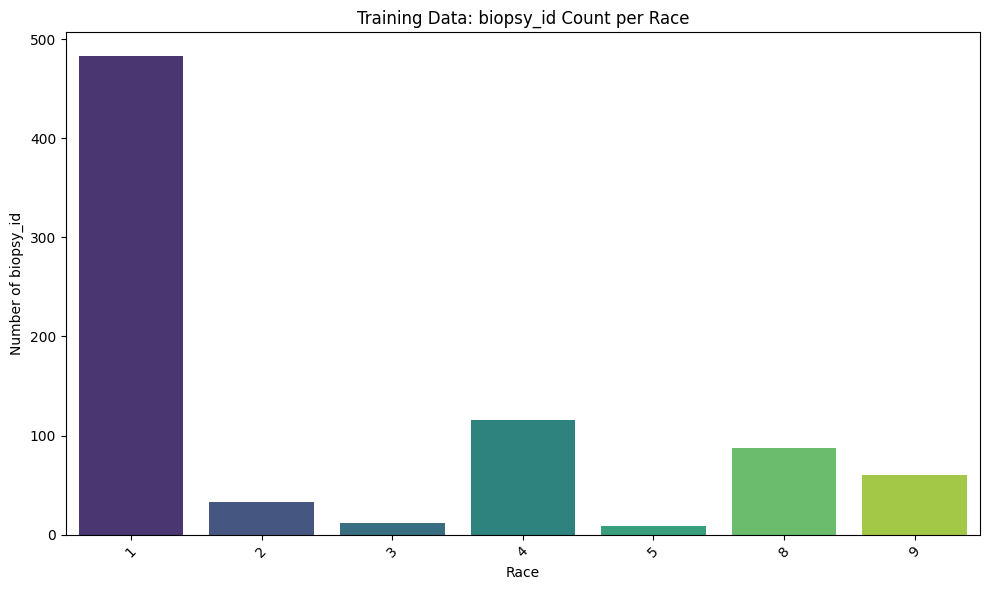

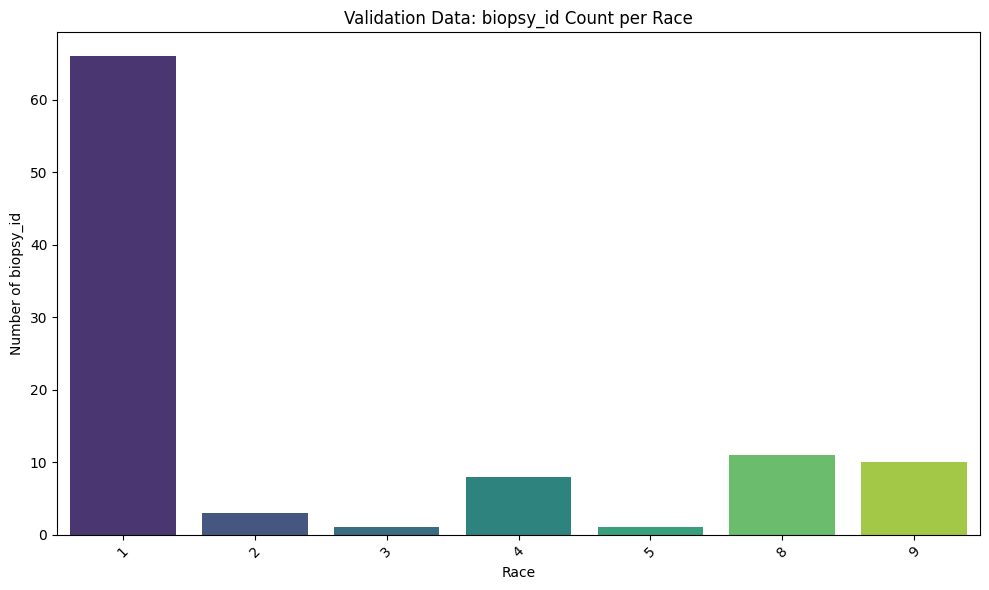

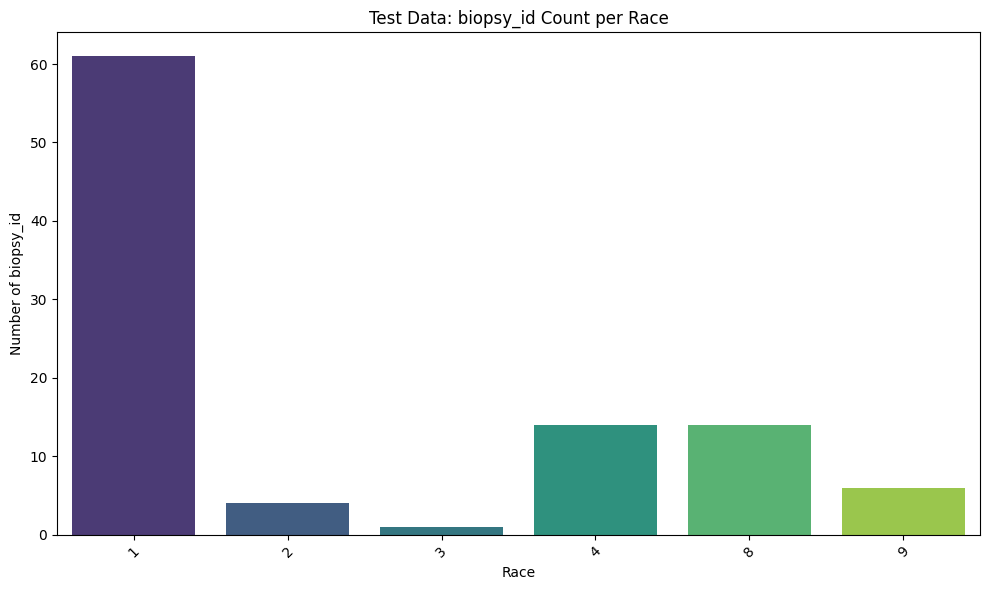

In [5]:
plot_biopsy_per_race(train_df, "Training Data: biopsy_id Count per Race")
plot_biopsy_per_race(valid_df, "Validation Data: biopsy_id Count per Race")
plot_biopsy_per_race(test_df, "Test Data: biopsy_id Count per Race")

In [6]:
def plot_biopsy_per_stage(df, title):
    """
    Plots the count of biopsy_id per stage.
    
    Parameters:
        df (pd.DataFrame): The dataframe to plot.
        title (str): Title for the plot.
    """
    counts = df.drop_duplicates(subset=["biopsy_id", "stage"]).groupby("stage")["biopsy_id"].count().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="stage", y="biopsy_id", data=counts, palette="viridis")
    plt.xlabel("Stage")
    plt.ylabel("Number of biopsy_id")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

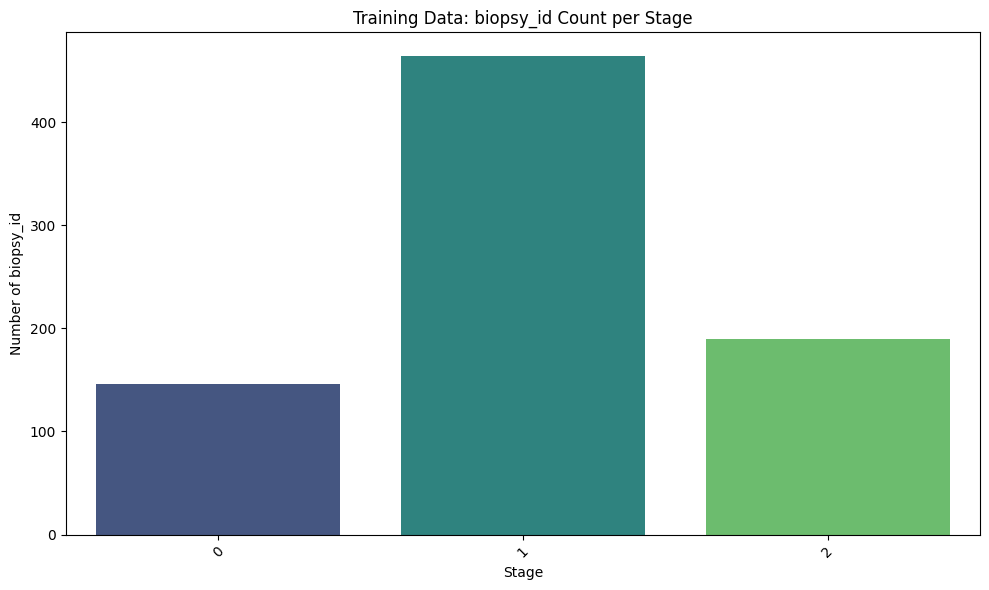

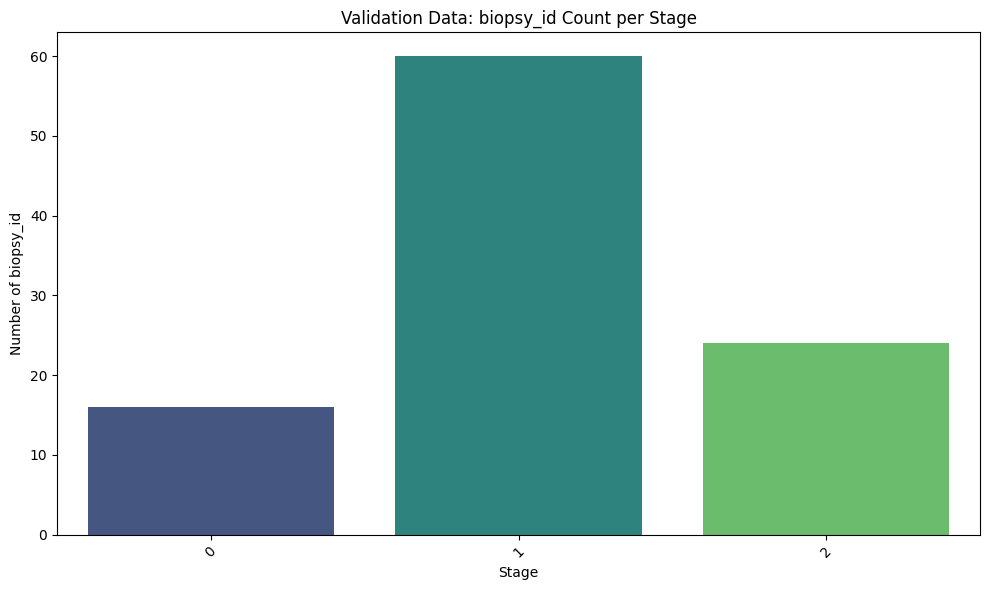

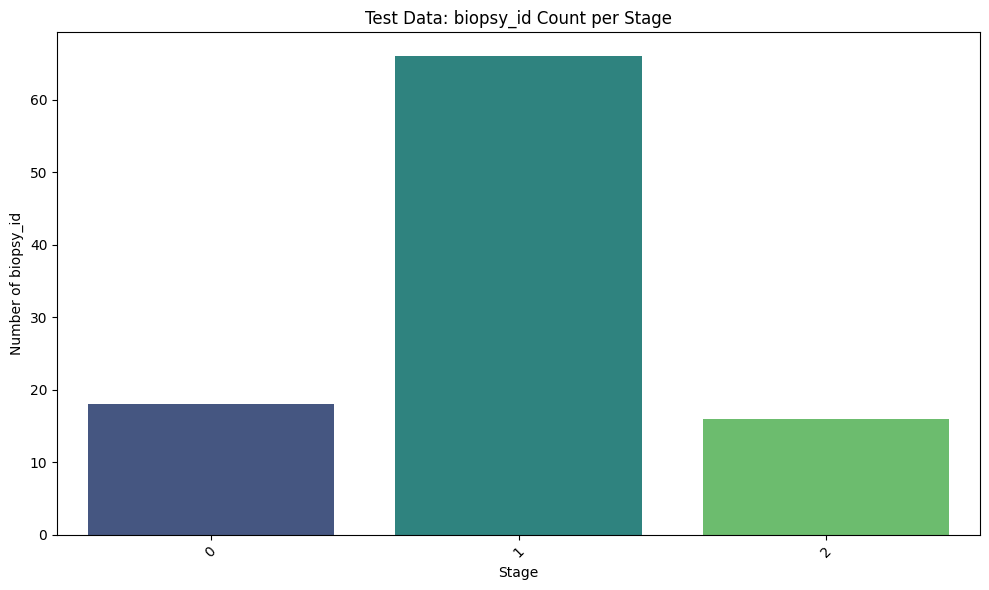

In [7]:
plot_biopsy_per_stage(train_df, 'Training Data: biopsy_id Count per Stage')
plot_biopsy_per_stage(valid_df, 'Validation Data: biopsy_id Count per Stage')
plot_biopsy_per_stage(test_df, 'Test Data: biopsy_id Count per Stage')

In [8]:
import os
import shutil
import pandas as pd

def copy_images_to_structure(df, source_folder, target_folder):
    """
    Copies images from the source folder to a new folder structure suitable for Image Folder.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'slide_id' and 'stage' columns.
        source_folder (str): Path to the folder containing original images.
        target_folder (str): Path to the target folder to store new folder structure.
    """
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    
    for index, row in df.iterrows():
        file_name = row["slide_id"] + ".png"
        class_label = str(row["stage"])
        
        new_path = os.path.join(target_folder, class_label)
        if not os.path.exists(new_path):
            os.makedirs(new_path)
        
        shutil.copy(os.path.join(source_folder, file_name), os.path.join(new_path, file_name))
    

In [9]:
source_folder = "/home/ngsci/datasets/brca-psj-path/contest-phase-2/png-downsampled-train"
target_folder_train = "/home/ngsci/project/Armin/metadata2/train" 
target_folder_valid = "/home/ngsci/project/Armin/metadata2/valid"
target_folder_test = "/home/ngsci/project/Armin/metadata2/test"
copy_images_to_structure(train_df, source_folder, target_folder_train)
copy_images_to_structure(valid_df, source_folder, target_folder_valid)
copy_images_to_structure(test_df, source_folder, target_folder_test)